In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Lab problem 01

**(i) Read images from a folder. & output.**

**Resize all the image (300*400) size and save it resized folder and show output**

In [1]:
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# Define the directory containing the original images
original_folder_path = "/content/drive/MyDrive/animal"
# Define the directory to save the resized images
resized_folder_path = "/content/drive/MyDrive/resized_images"
# Create the resized folder if it doesn't exist
os.makedirs(resized_folder_path, exist_ok=True)
# List all files in the original folder
files = os.listdir(original_folder_path)
# Display original images
num_images = len(files)  # Corrected to get the number of images from 'files'
if num_images == 0:
    print("No images found.")
else:
    num_rows = (num_images - 1) // 6 + 1  # Calculate number of rows for subplots
    for i in range(num_images):
        plt.subplot(num_rows, 6, i+1)  # Adjust the subplot layout as needed
        plt.imshow(Image.open(os.path.join(original_folder_path, files[i])))  # Open and display each image
        plt.axis('off')  # Turn off axis labels
    plt.show()

# Resize and save all images
for file in files:
    file_path = os.path.join(original_folder_path, file)
    # Check if the file is an image
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Open the image
        img = Image.open(file_path)
        # Resize the image to 300x400 pixels
        img_resized = img.resize((300, 400))
        # Save the resized image to the resized folder
        resized_file_path = os.path.join(resized_folder_path, file)
        img_resized.save(resized_file_path)
print("This is the resized image (300*400)")
# Get the number of resized images after resizing and saving
num_resized_images = len(os.listdir(resized_folder_path))
# Display all the resized images
if num_resized_images == 0:
    print("No images found.")
else:
    num_rows = (num_resized_images - 1) // 6 + 1  # Calculate number of rows for subplots
    for i in range(num_resized_images):
        plt.subplot(num_rows, 6, i+1)  # Adjust the subplot layout as needed
        plt.imshow(Image.open(os.path.join(resized_folder_path, os.listdir(resized_folder_path)[i])))  # Open and display each image
        plt.axis('off')  # Turn off axis labels
    plt.show()


# Perform color transform and save all images
# Define the directory to save the color transform images
color_transform_folder_path = "/content/drive/MyDrive/color_transform_images"
# Create the color transform folder if it doesn't exist
os.makedirs(color_transform_folder_path, exist_ok=True)
for file in files:
    file_path = os.path.join(resized_folder_path, file)
    # Check if the file is an image
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Open the resized image
        img_resized = Image.open(file_path)
        # Perform color transformation (example: convert to grayscale)
        img_color_transformed = img_resized.convert("L")  # Convert to grayscale
        # Save the color transformed image to the color transform folder
        color_transformed_file_path = os.path.join(color_transform_folder_path, file)
        img_color_transformed.save(color_transformed_file_path)
print("All the Color transformation images")
# Display all the Color transformation images
num_images = len(os.listdir(color_transform_folder_path))
if num_images == 0:
    print("No images found.")
else:
    num_rows = (num_images - 1) // 6 + 1  # Calculate number of rows for subplots
    for i in range(num_images):
        plt.subplot(num_rows, 6, i+1)  # Adjust the subplot layout as needed
        plt.imshow(Image.open(os.path.join(color_transform_folder_path, files[i])))  # Open and display each image
        plt.axis('off')  # Turn off axis labels
    plt.show()
print("Color transformation and saving completed.")

# Define the directory to save the filtered images
filtered_folder_path = "/content/drive/MyDrive/filtered_images"
# Create the filtered folder if it doesn't exist
os.makedirs(filtered_folder_path, exist_ok=True)
# Filter and save all images
for file in files:
    file_path = os.path.join(color_transform_folder_path, file)  # Use a different variable name for file paths
    # Check if the file is an image
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Open the color-transformed image
        img_ct = Image.open(file_path)
        # Apply mean filter (box blur)
        img_filtered = img_ct.filter(ImageFilter.BoxBlur(radius=2))  # Adjust the radius as needed
        # Save the filtered image to the filtered folder
        filtered_file_path = os.path.join(filtered_folder_path, file)
        img_filtered.save(filtered_file_path)
print("The filtered output image")
# Display all the filtered images
num_images = len(files)
if num_images == 0:
    print("No images found.")
else:
    num_rows = (num_images - 1) // 6 + 1  # Calculate number of rows for subplots
    for i in range(num_images):
        plt.subplot(num_rows, 6, i+1)  # Adjust the subplot layout as needed
        plt.imshow(Image.open(os.path.join(filtered_folder_path, files[i])))  # Open and display each image
        plt.axis('off')  # Turn off axis labels
    plt.show()
print("Filtering and saving completed.")


# Define the directory to save the normalized images
normalized_folder_path = "/content/drive/MyDrive/normalized_color_images"
# Create the normalized folder if it doesn't exist
os.makedirs(normalized_folder_path, exist_ok=True)
# List all files in the color-transform folder
files = os.listdir(color_transform_folder_path)
# Normalize and save all images
for file in files:
    file_path = os.path.join(color_transform_folder_path, file)
    # Check if the file is an image
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Open the color-transformed image
        img_ct = Image.open(file_path)
        # Convert the image to numpy array
        img_array = np.array(img_ct)
        # Normalize the image
        img_normalized = img_array / 255.0
        # Convert the normalized array back to image
        img_normalized = Image.fromarray((img_normalized * 255).astype(np.uint8))
        # Save the normalized image to the normalized folder
        normalized_file_path = os.path.join(normalized_folder_path, file)
        img_normalized.save(normalized_file_path)

# Get the list of normalized image files
normalized_files = os.listdir(normalized_folder_path)
# Display the normalized images
num_images = len(normalized_files)
if num_images == 0:
    print("No images found.")
else:
    num_rows = (num_images - 1) // 6 + 1  # Calculate number of rows for subplots
    for i in range(num_images):
        plt.subplot(num_rows, 6, i+1)  # Adjust the subplot layout as needed
        plt.imshow(Image.open(os.path.join(normalized_folder_path, normalized_files[i])))  # Open and display each image
        plt.axis('off')  # Turn off axis labels
    plt.show()
print("Normalization and saving completed.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/animal'

**2 Write a program to execute Semantic Segmentation. **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


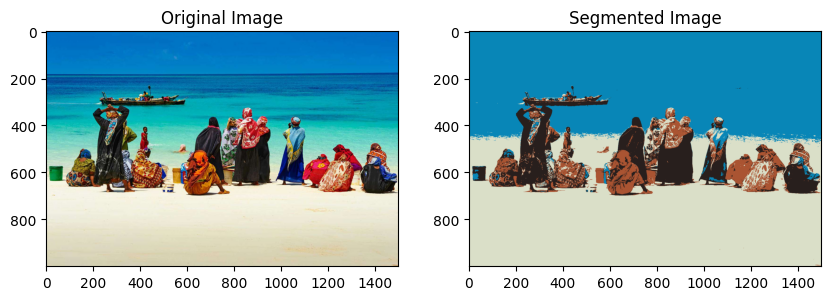

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/drive/MyDrive/sea beach.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)
# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(pixels)
# Get the cluster centers and labels
centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_
# Assign each pixel to its corresponding cluster center
segmented_image = centers[labels]
# Reshape the segmented image to its original shape
segmented_image = segmented_image.reshape(image.shape)
# Display the original image and segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()


3.

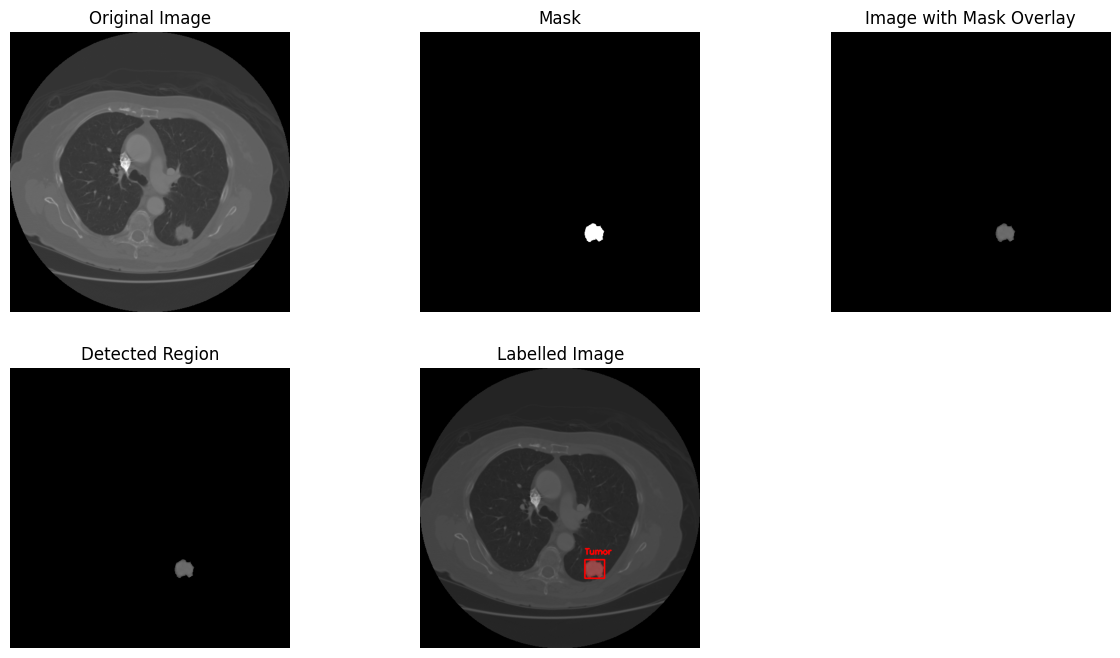

Area of the determined region: 890


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image and the mask
image = cv2.imread("/content/drive/MyDrive/Images.png")
mask = cv2.imread("/content/drive/MyDrive/Mask.png", cv2.IMREAD_GRAYSCALE)
# Apply the mask on the image
masked_image = cv2.bitwise_and(image, image, mask=mask)
# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Calculate the area of the mask on the image
mask_area = 0
for contour in contours:
    mask_area += cv2.contourArea(contour)
# Determine the region using the mask
region = cv2.bitwise_and(image, image, mask=mask)
# Compute the area of the determined region
area = np.sum(mask != 0)
# Create a copy of the mask with red color
red_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
red_mask[mask != 0] = [0, 0, 255]  # Set non-zero mask pixels to red color (BGR format)
# Overlay the red mask onto the original image
labelled_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)
# Add a rectangle outside the determined region
x, y, w, h = cv2.boundingRect(mask)  # Get bounding box coordinates
cv2.rectangle(labelled_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle
# Add label "tumor" to the rectangle
cv2.putText(labelled_image, 'Tumor', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
# Display the results
plt.figure(figsize=(15, 8))
# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
# Mask
plt.subplot(2, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")
# Image with Mask Overlay
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Mask Overlay")
plt.axis("off")
# Region
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
plt.title("Detected Region")
plt.axis("off")
# Labelled Image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(labelled_image, cv2.COLOR_BGR2RGB))
plt.title("Labelled Image")
plt.axis("off")
plt.show()
# Output area
print("Area of the determined region:", area)


**4 Intensity Transformation Operations on Images**

The orginal image


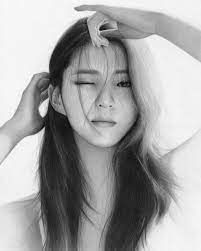

The image negation


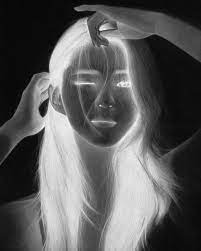

The log transform image


<ipython-input-2-773773d54e39>:23: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image_gray)


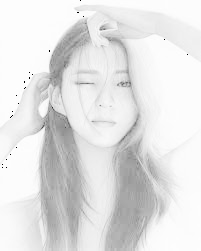

The power log transform


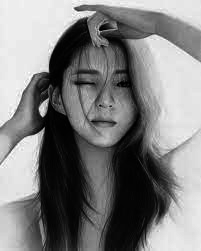

The piecewise-linear transformation


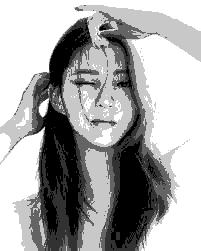

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read the image in grayscale
image_gray = cv2.imread("/content/drive/MyDrive/images.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image_gray is None:
    print("Error: Could not read the image.")
else:
    # Negate the grayscale image
    negated_image_gray = 255 - image_gray

    # Display the original and negated grayscale images
    print("The orginal image")
    cv2_imshow(image_gray)
    print("The image negation")
    cv2_imshow(negated_image_gray)

    # Apply log transformation
    c = 255 / np.log(1 + np.max(image_gray) + 1e-6)  # Add a small constant to avoid division by zero
    log_transformed = c * np.log(1 + image_gray)
    log_transformed = np.array(log_transformed, dtype=np.uint8)
    print("The log transform image")
    cv2_imshow(log_transformed)

    # Apply power-law transformation with gamma
    gamma = 2
    adjusted_image = np.uint8(np.power(image_gray / 255.0, gamma) * 255)
    print("The power log transform")
    cv2_imshow(adjusted_image)

    # Define the breakpoints and corresponding mapping values
    breakpoints = [50, 100, 150, 200]
    mapping_values = [0, 50, 100, 200, 255]

    # Apply piecewise-linear transformation
    piecewise = np.piecewise(image_gray, [image_gray < breakpoints[0],
                                          (image_gray >= breakpoints[0]) & (image_gray < breakpoints[1]),
                                          (image_gray >= breakpoints[1]) & (image_gray < breakpoints[2]),
                                          (image_gray >= breakpoints[2]) & (image_gray < breakpoints[3]),
                                          image_gray >= breakpoints[3]],
                             mapping_values)

    print("The piecewise-linear transformation")
    cv2_imshow(piecewise)


Original Image


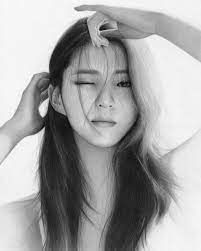

High-pass Filter Convolved Image


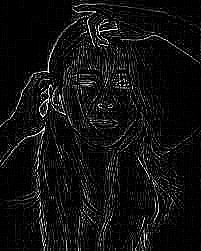

low_pass_convolved_image


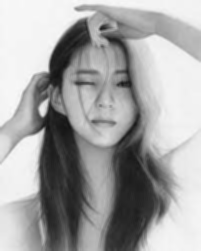

Display the laplacian filtered images


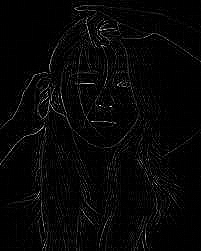

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/content/drive/MyDrive/images.jpg', cv2.IMREAD_GRAYSCALE)

# Define the high-pass filter kernel
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Perform convolution
convolved_image = cv2.filter2D(image, -1, high_pass_kernel)

# Display the original and convolved images
print("Original Image")
cv2_imshow(image)
print("High-pass Filter Convolved Image")
cv2_imshow(convolved_image)

# Define the low-pass filter kernel (averaging filter)
low_pass_kernel = np.ones((3, 3), dtype=np.float32) / 9
# Perform convolution
low_pass_convolved_image = cv2.filter2D(image, -1, low_pass_kernel)
print("low_pass_convolved_image")
cv2_imshow(low_pass_convolved_image)

# Define the Laplacian filter kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the Laplacian filter to the image
lap_filtered_image = cv2.filter2D(image, -1, laplacian_kernel)

# Display the laplacian filtered images
print("Display the laplacian filtered images")
cv2_imshow(lap_filtered_image)



# 5 Write a program to execute the following edge detections
•	Canny edge detection
•	Prewitt edge detection
•	Sobel edge detection


The orginal image


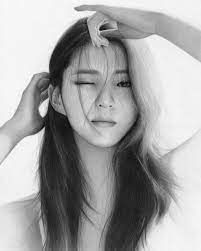

The canny's edge detection


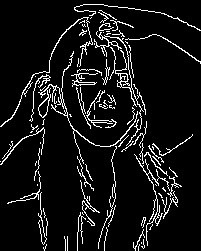

Display Prewitt edges


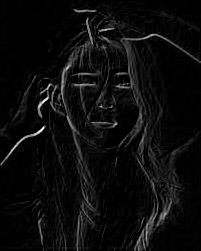

The sobel edge detection


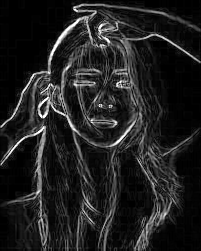

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read the image in grayscale
image_gray = cv2.imread("/content/drive/MyDrive/images.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image_gray is None:
    print("Error: Could not read the image.")
else:
    # Apply Canny edge detection
    edges = cv2.Canny(image_gray, 100, 200)  # Adjust the threshold values as needed
    # Display the original image and Canny edges
    print("The orginal image")
    cv2_imshow(image_gray)
    print("The canny's edge detection")
    cv2_imshow(edges)

 # Define Prewitt kernels for horizontal and vertical edge detection
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])

    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])

    # Apply Prewitt kernels using cv2.filter2D()
    edges_x = cv2.filter2D(image_gray, -1, kernel_x)
    edges_y = cv2.filter2D(image_gray, -1, kernel_y)

    # Combine horizontal and vertical edge images to get the final edges
    edges = cv2.addWeighted(cv2.convertScaleAbs(edges_x), 0.5, cv2.convertScaleAbs(edges_y), 0.5, 0)

    # Display the original image and Prewitt edges
    print("Display Prewitt edges")
    cv2_imshow(edges)

    # Apply Sobel edge detection
    edges_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    edges_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

    # Convert back to uint8 and combine horizontal and vertical edges
    edges_x = cv2.convertScaleAbs(edges_x)
    edges_y = cv2.convertScaleAbs(edges_y)
    edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)

    # Display the original image and Sobel edges
    print("The sobel edge detection")
    cv2_imshow(edges)

# ** 6 Write a program to execute the following speech preprocessing
•	Identify sampling frequency
•	Identify bit resolution
•	Make down sampling frequency then save the speech signal.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from IPython.display import Audio

# Read the audio file
signal, sample_rate = librosa.load('/content/drive/MyDrive/harvard.wav', sr=None)

# Identify and print sampling frequency
print("Original Sampling Frequency (Hz):", sample_rate)

# Get the data type of the audio signal
dtype = signal.dtype

# Calculate the bit depth based on the data type
bit_depth = np.dtype(dtype).itemsize * 8
print("Bit Depth:", bit_depth)

# Calculate the bit resolution
bit_resolution = 2 ** bit_depth
print("Bit Resolution:", bit_resolution)

# Plot the original signal
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)
plt.show()

# Undersample the signal
undersampling_factor = 2
signal_undersampled = signal[::undersampling_factor]
sample_rate_undersampled = sample_rate // undersampling_factor
print("Undersampled Sampling Frequency (Hz):", sample_rate_undersampled)

# Plot the undersampled signal
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal_undersampled, sr=sample_rate_undersampled, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Undersampled Signal')
plt.grid(True)
plt.show()

# Plot spectrograms of both signals
plt.figure(figsize=(14, 10))

# Original signal spectrogram
plt.subplot(2, 1, 1)
spectrogram_orig = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(spectrogram_orig, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Signal Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Undersampled signal spectrogram
plt.subplot(2, 1, 2)
spectrogram_undersampled = librosa.feature.melspectrogram(y=signal_undersampled, sr=sample_rate_undersampled)
librosa.display.specshow(librosa.power_to_db(spectrogram_undersampled, ref=np.max), sr=sample_rate_undersampled, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Undersampled Signal Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

# Play the undersampled audio signal
print("Playing undersampled audio signal:")
Audio(data=signal_undersampled, rate=sample_rate_undersampled)


# ** 7 Write a program to display the following region of a speech signal.
•	Voiced region.
•	Unvoiced region.
•	Silence region.**


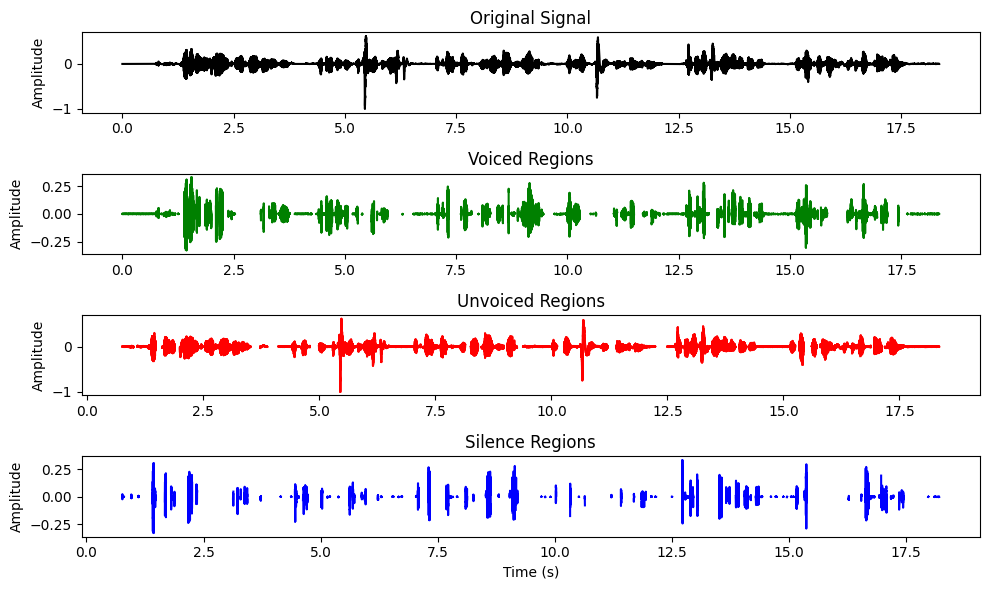

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Read the audio file
y, fs = librosa.load('/content/drive/MyDrive/harvard.wav', sr=None)

# Define frame size and overlap (in samples)
frame_size = 256
overlap = 128

# Calculate number of frames
num_frames = (len(y) - frame_size) // (frame_size - overlap) + 1

# Initialize variables
voiced_frames = []
unvoiced_frames = []
silence_frames = []

# Iterate through each frame
for i in range(num_frames):
    # Extract current frame
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    frame = y[start_idx:end_idx]

    # Calculate energy of the frame
    energy = np.sum(np.abs(frame)**2)

    # Calculate zero-crossing rate (ZCR)
    zcr = np.sum(np.diff(np.sign(frame)) != 0)

    # Thresholds for voiced, unvoiced, and silence detection
    voiced_threshold = 0.01 * np.max(energy)  # adjust threshold based on your audio
    unvoiced_threshold = 0.001 * np.max(energy)  # adjust threshold based on your audio
    silence_threshold = 0.0001 * np.max(energy)  # adjust threshold based on your audio

    # Identify frame type based on energy and ZCR
    if energy > voiced_threshold and zcr > 10:  # adjust values for voiced detection
        voiced_frames.append(i)
    elif energy > unvoiced_threshold and zcr < 10:  # adjust values for unvoiced detection
        unvoiced_frames.append(i)
    else:
        silence_frames.append(i)

# Calculate time axis for plotting
time_axis = np.arange(len(y)) / fs

# Plot the original signal separately
plt.figure(figsize=(10, 6))

# Plot original signal
plt.subplot(4, 1, 1)
plt.plot(time_axis, y, 'k')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Plot voiced segments
plt.subplot(4, 1, 2)
for i in voiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'g')
plt.ylabel('Amplitude')
plt.title('Voiced Regions')

# Plot unvoiced segments
plt.subplot(4, 1, 3)
for i in unvoiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'r')
plt.ylabel('Amplitude')
plt.title('Unvoiced Regions')

# Plot silence segments
plt.subplot(4, 1, 4)
for i in silence_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Silence Regions')

# Adjust layout
plt.tight_layout()
plt.show()


**8 Write a program to compute zero crossing rate (ZCR) using different window function of a speech signal.**

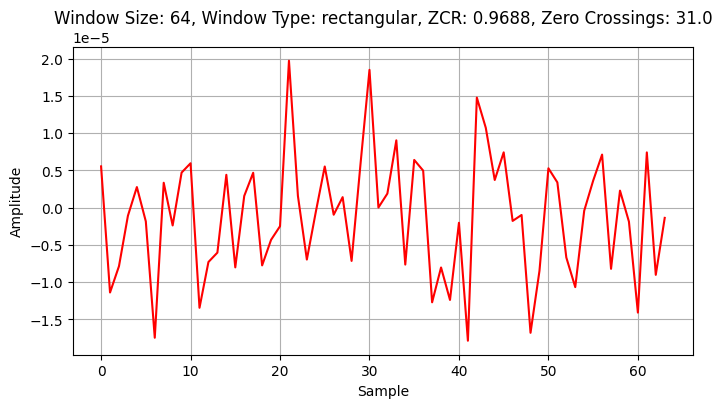

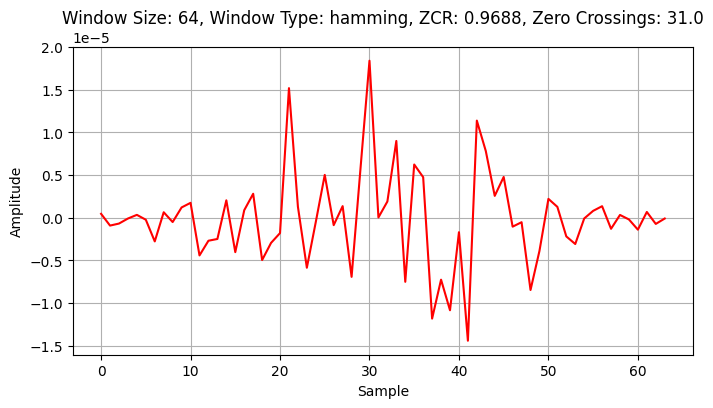

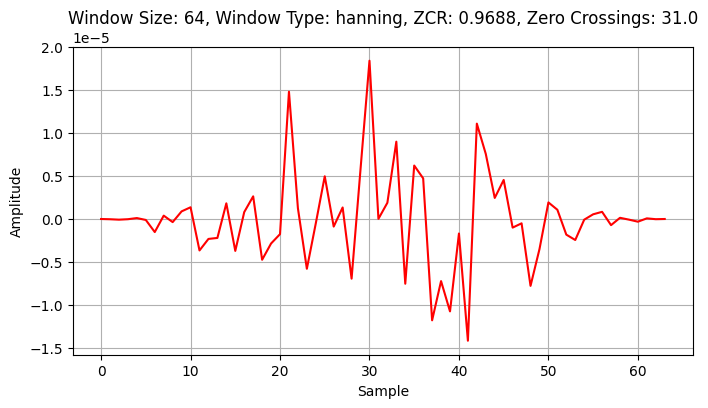

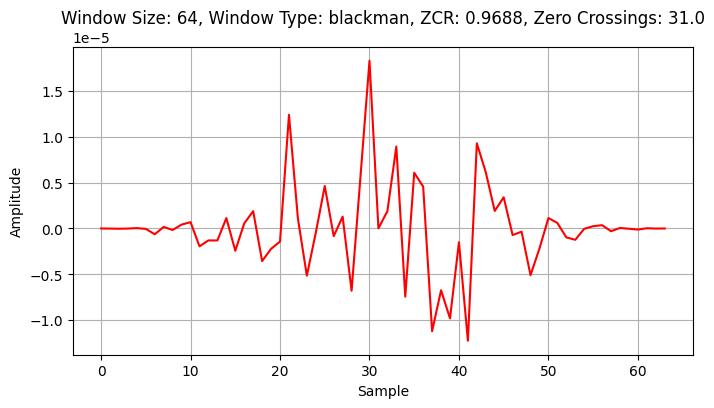

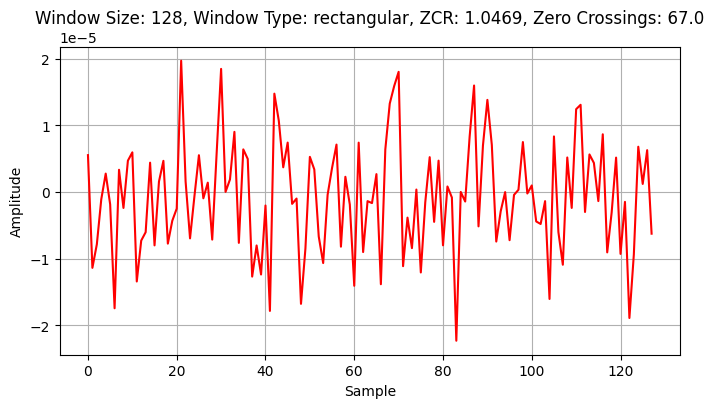

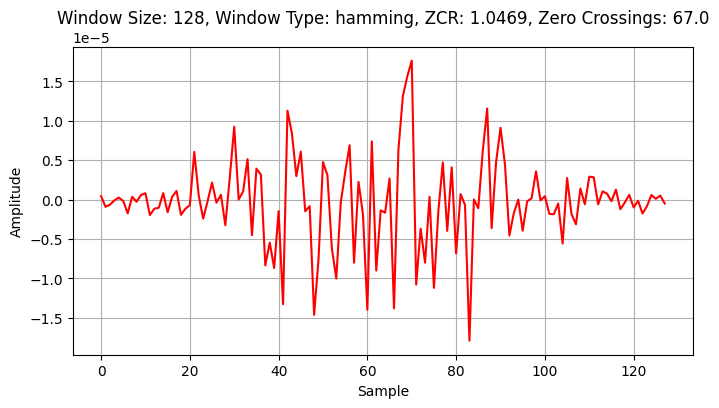

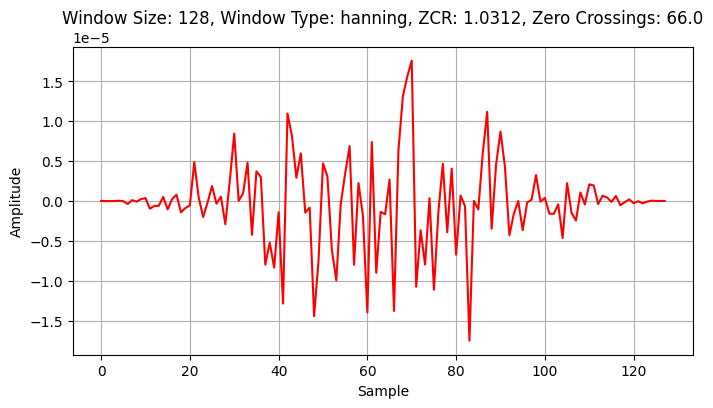

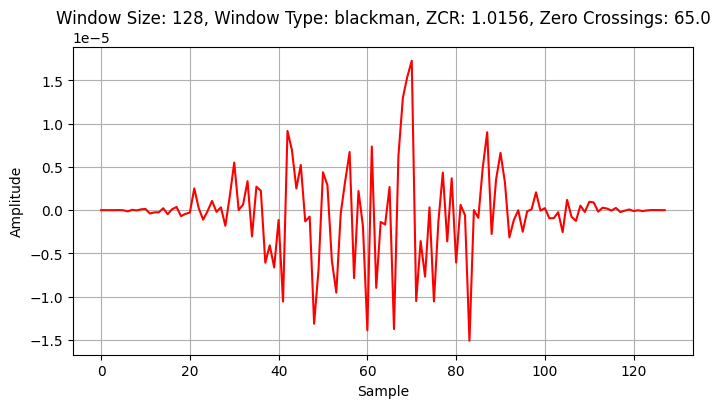

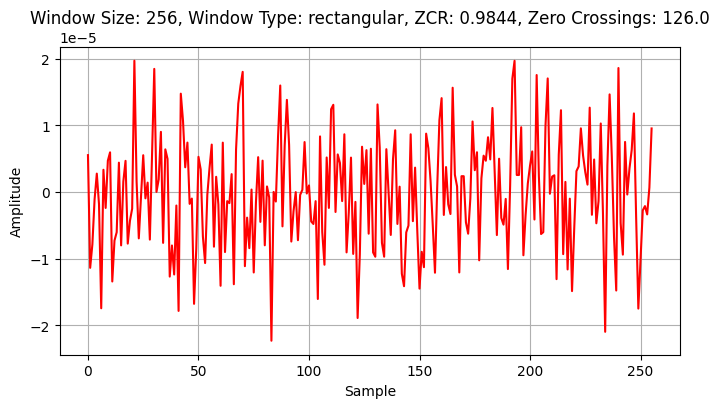

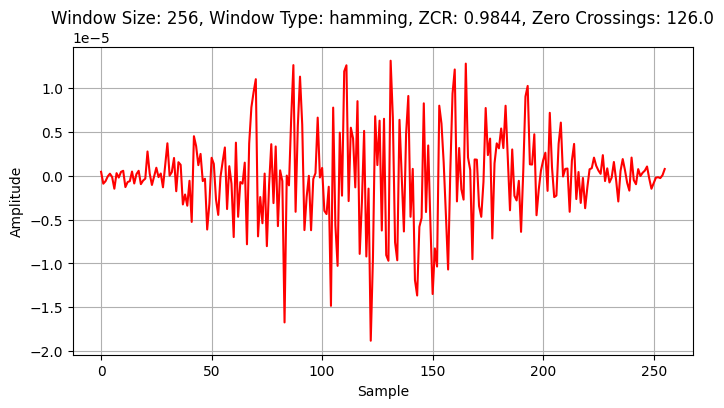

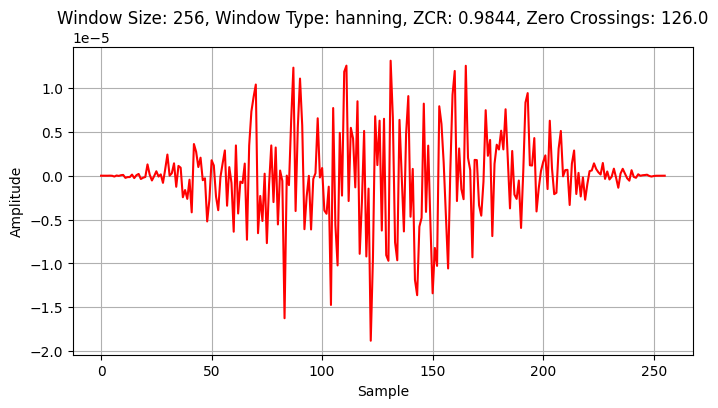

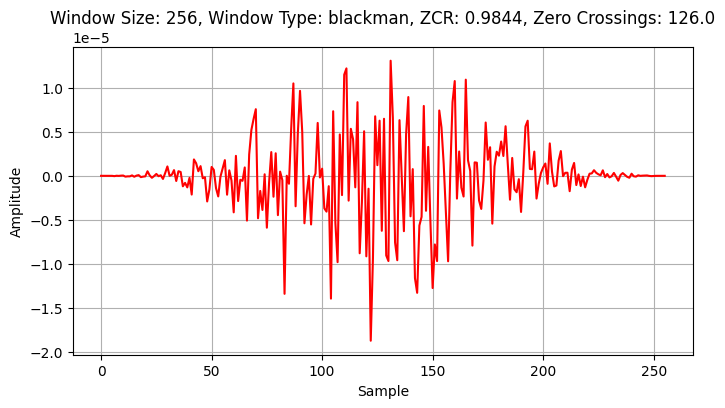

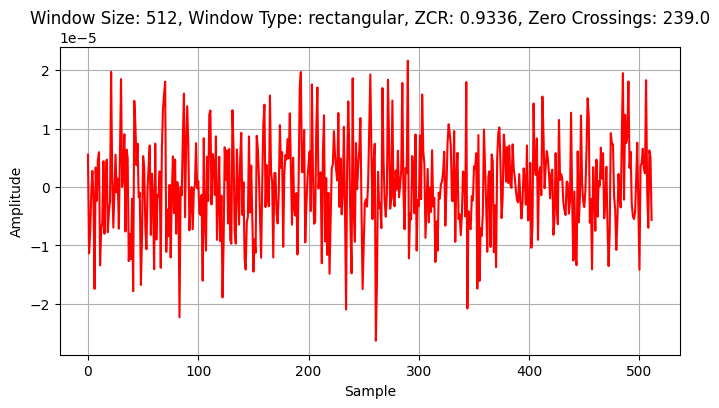

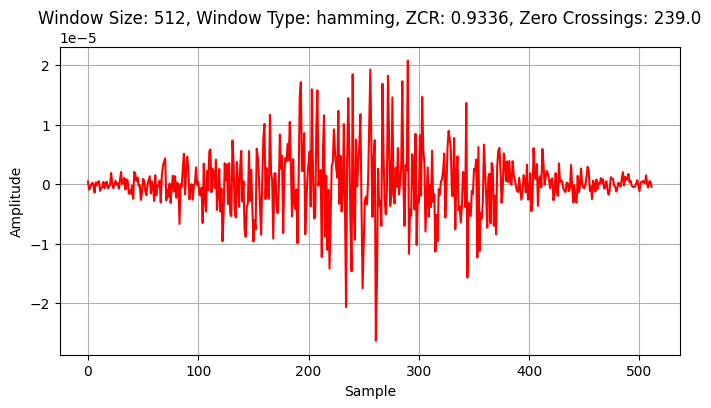

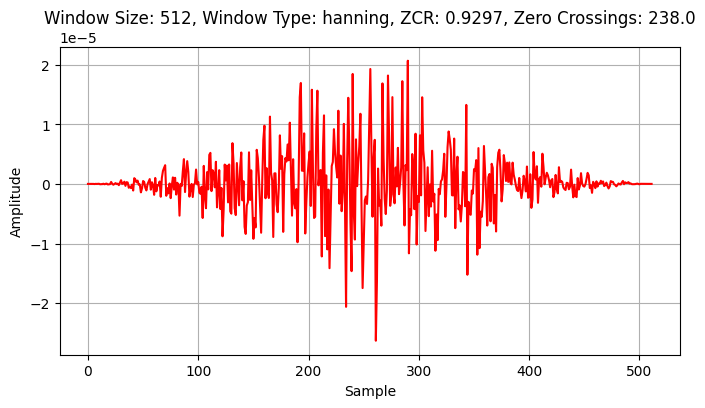

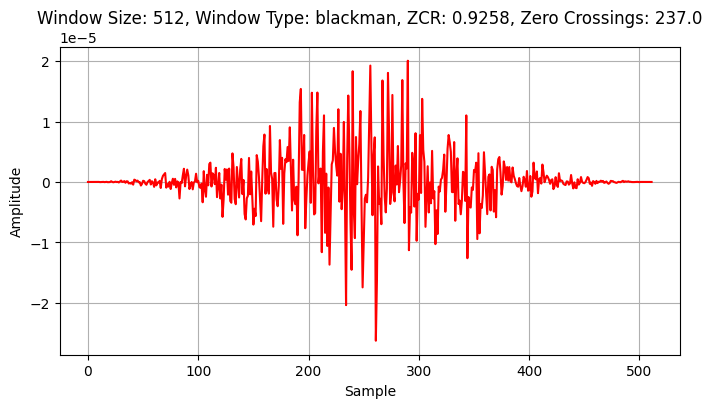

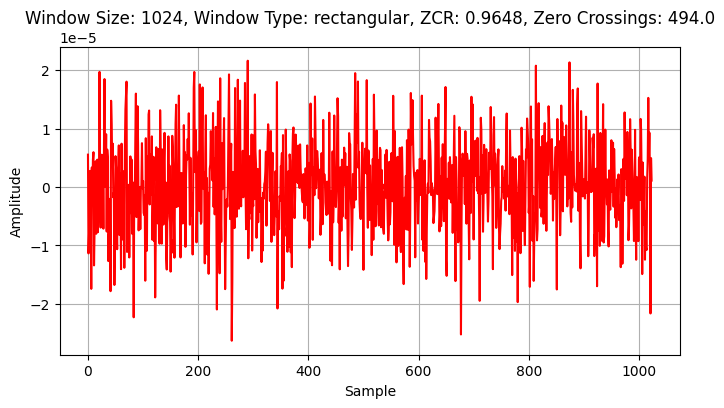

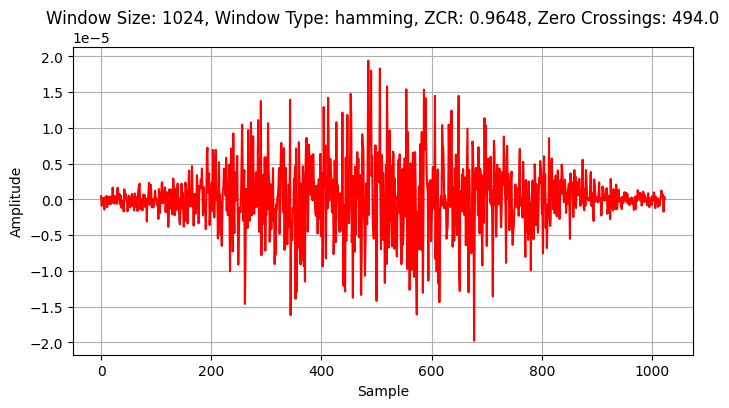

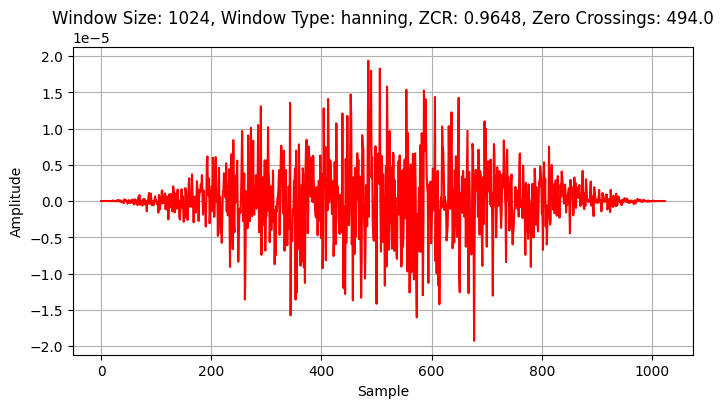

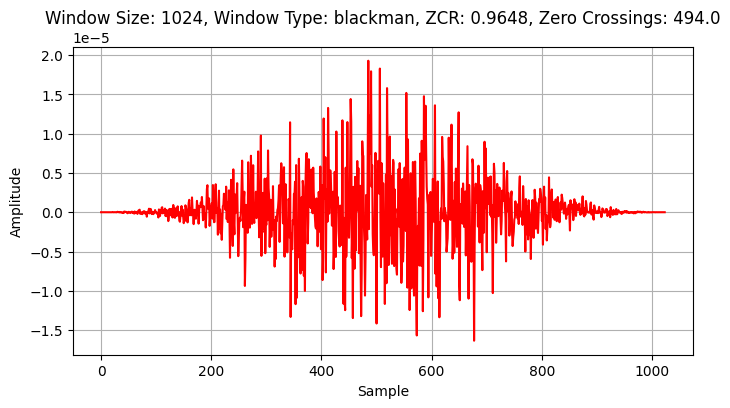

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the speech signal
y, sr = librosa.load('/content/drive/MyDrive/harvard.wav')

# Define window sizes and types
window_sizes = [64, 128, 256, 512, 1024]
window_types = ['rectangular', 'hamming', 'hanning', 'blackman']

# Compute ZCR and zero crossings for each window size and type
for win_size in window_sizes:
    for win_type in window_types:
        # Generate the window function
        if win_type == 'rectangular':
            window = np.ones(win_size)
        elif win_type == 'hamming':
            window = np.hamming(win_size)
        elif win_type == 'hanning':
            window = np.hanning(win_size)
        elif win_type == 'blackman':
            window = np.blackman(win_size)

        # Apply the window function
        y_windowed = y[:len(window)] * window

        # Compute ZCR
        zcr = np.sum(np.abs(np.diff(np.sign(y_windowed)))) / len(y_windowed)

        # Compute zero crossings
        zero_crossings = np.sum(np.abs(np.diff(np.sign(y_windowed)))) / 2

        # Plot the windowed signal
        plt.figure(figsize=(8, 4))
        plt.plot(y_windowed, color='red')
        plt.title(f'Window Size: {win_size}, Window Type: {win_type}, ZCR: {zcr:.4f}, Zero Crossings: {zero_crossings}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()


**09 Write a program to compute short term auto-correlation of a speech signal.**

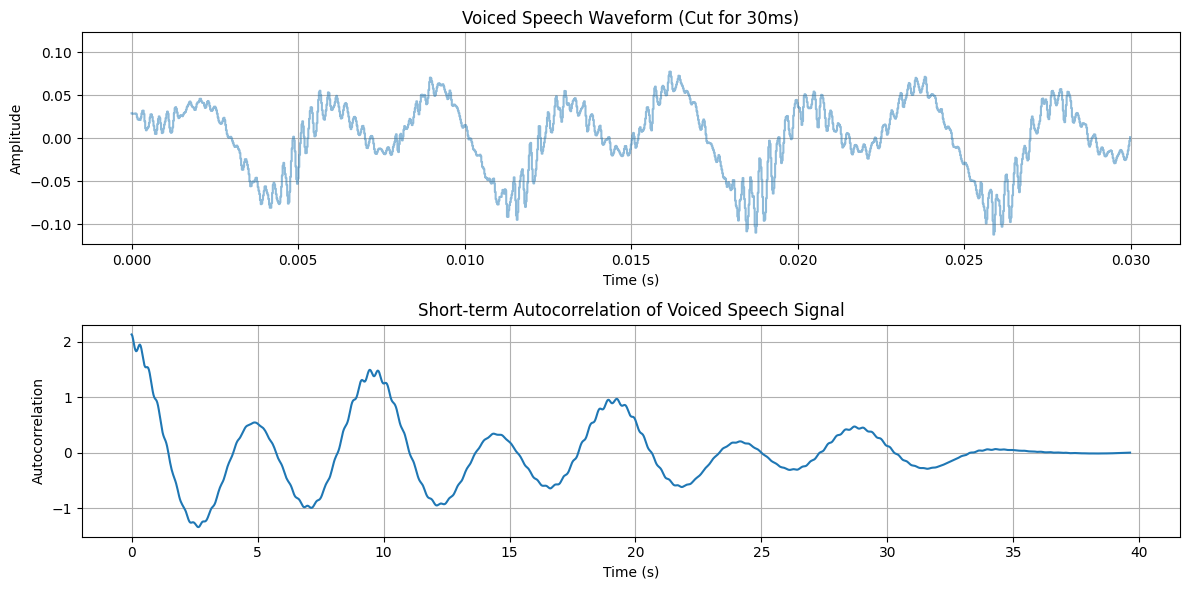

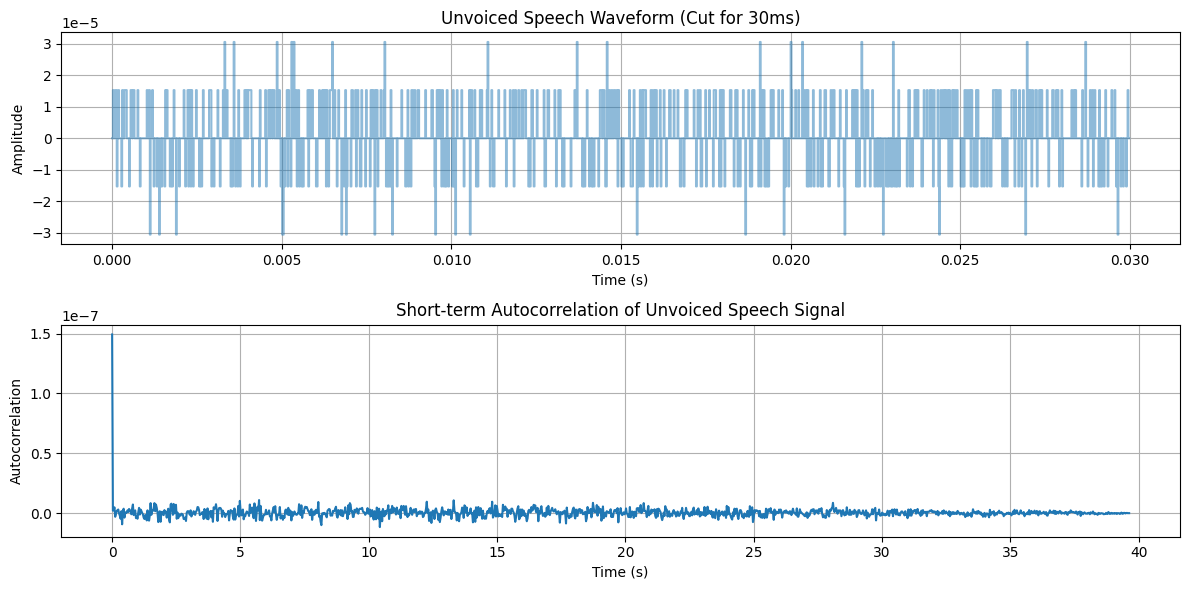

In [10]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, signal_type):
    # Compute short-term autocorrelation
    auto_corr = librosa.autocorrelate(y=cut_signal, max_size=frame_length)

    # Plot speech waveform and autocorrelation
    plt.figure(figsize=(12, 6))

    # Plot speech waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(cut_signal, sr=sr, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(signal_type + ' Speech Waveform (Cut for 30ms)')
    plt.grid(True)

    # Plot autocorrelation
    plt.subplot(2, 1, 2)
    plt.plot(librosa.frames_to_time(range(len(auto_corr)), hop_length=hop_length), auto_corr)
    plt.xlabel('Time (s)')
    plt.ylabel('Autocorrelation')
    plt.title('Short-term Autocorrelation of ' + signal_type + ' Speech Signal')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Usage example
audio_file = r"/content/drive/MyDrive/harvard.wav"

# Load the audio file
signal, sr = librosa.load(audio_file, sr=None)

# Parameters
frame_duration = 0.03  # 30 ms frame duration
hop_duration = frame_duration / 2  # Half of frame duration for 50% overlap

# Convert durations to samples
frame_length = int(sr * frame_duration)
hop_length = int(sr * hop_duration)

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(5*sr):int(5.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Voiced')

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(4*sr):int(4.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Unvoiced')


**10 Write a program to estimate pitch of a speech signal.**

Pitch Period (To): 0.004081632653061225
Pitch Frequency (Fo): 244.99999999999997


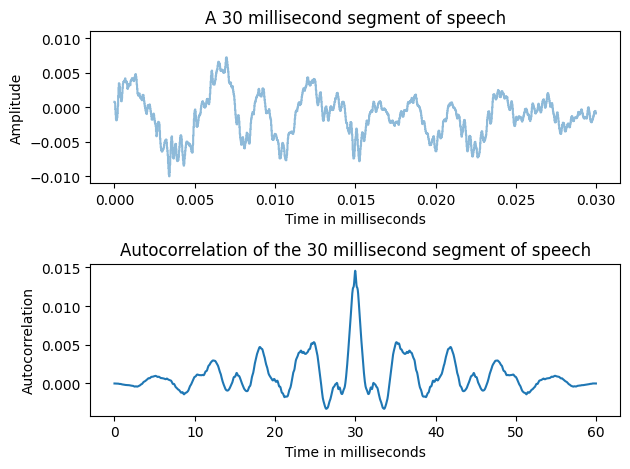

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
# Read the speech segment from the WAV file using Librosa
# y, Fs = librosa.load(r"C:\Users\Win-10\OneDrive\Desktop\Lab_3.2\Recording.wav", sr=None)
y, Fs = librosa.load(r"/content/drive/MyDrive/harvard.wav", sr=None)
# Cut a portion of the speech signal (for example, for 30 ms)
start_time = 4.515
end_time = 4.545
y = y[int(start_time * Fs):int(end_time * Fs)]
# Compute autocorrelation
autocorrelation = np.correlate(y, y, mode='full')
# Time axis for autocorrelation plot (in milliseconds)
kk = np.arange(0, len(autocorrelation)) / Fs * 1000
# Plot original signal
plt.subplot(2, 1, 1)
# plt.plot(np.arange(len(y)) / Fs * 1000, y)
librosa.display.waveshow(y, sr=Fs, alpha=0.5)
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('A 30 millisecond segment of speech')
# Plot autocorrelation
plt.subplot(2, 1, 2)
plt.plot(kk, autocorrelation)
plt.xlabel('Time in milliseconds')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the 30 millisecond segment of speech')
# Extract relevant part of autocorrelation (21 to 160)
auto = autocorrelation[20:160]
# Find the maximum value and corresponding sample number
max_idx = np.argmax(auto)
sample_no = max_idx + 21 # Adjust for the indexing
pitch_period_To = (20 + sample_no) * (1 / Fs)
pitch_freq_Fo = 1 / pitch_period_To
print("Pitch Period (To):", pitch_period_To)
print("Pitch Frequency (Fo):", pitch_freq_Fo)
plt.tight_layout()
plt.show()